# ***Logistic Regression***

In [ ]:
# Import Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Loading Dataset
wine_data = pd.read_csv("/content/winequality-red.csv")
wine_data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


***Exploratory Data Analysis***

In [ ]:
wine_data.shape

(1599, 12)

In [ ]:
# Checking Missing Values
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
# Check duplicate values
wine_data.duplicated().sum()

240

In [ ]:
wine_dataset = wine_data.drop_duplicates()

In [ ]:
wine_dataset.duplicated().sum()

0

In [ ]:
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
wine_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


***Data Visualization***

<Figure size 800x600 with 0 Axes>

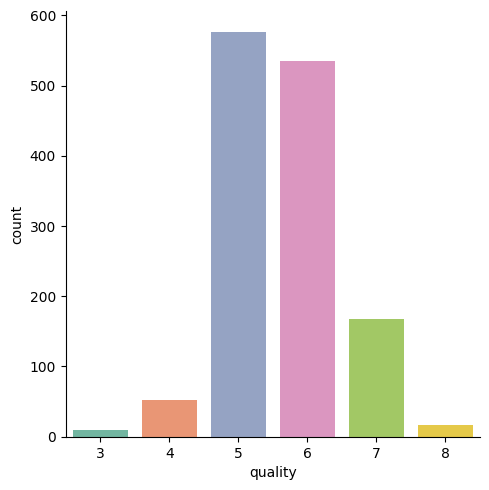

In [ ]:
plt.figure(figsize=(8, 6))
sns.catplot(x='quality' , data = wine_dataset , kind = 'count',palette='Set2')
plt.show()

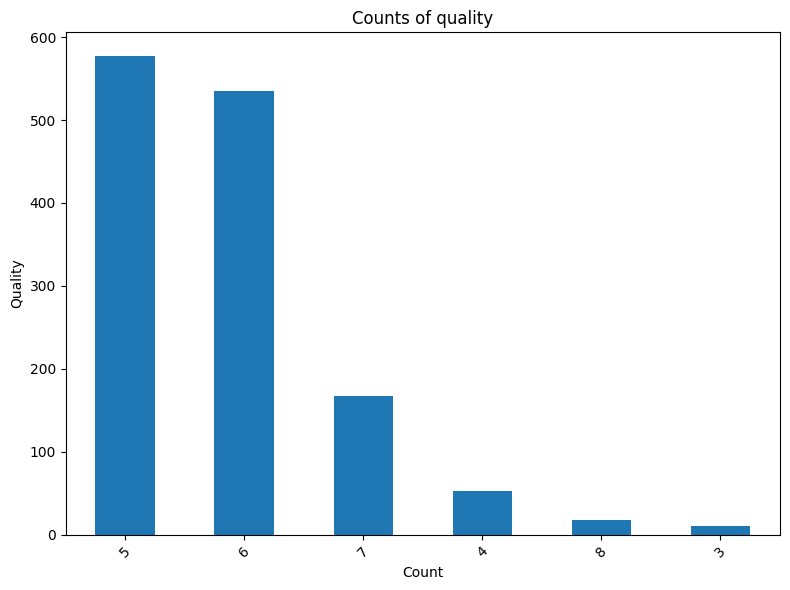

In [ ]:
quality_counts = wine_dataset['quality'].value_counts()
# Plotting the counts
plt.figure(figsize=(8, 6))
quality_counts.plot(kind='bar')
plt.xlabel('Count')
plt.ylabel('Quality')
plt.title('Counts of quality')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 800x600 with 0 Axes>

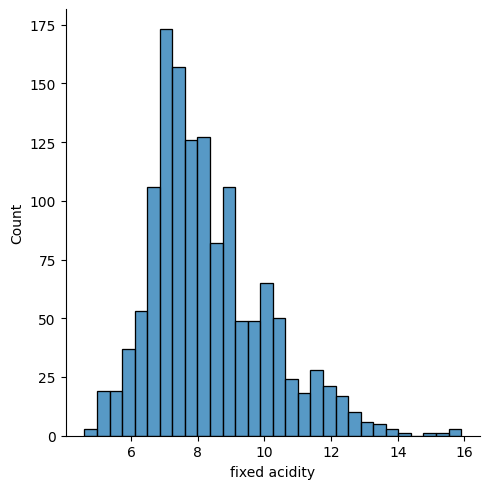

In [ ]:
plt.figure(figsize=(8, 6))
sns.displot(wine_dataset['fixed acidity'])
plt.show()

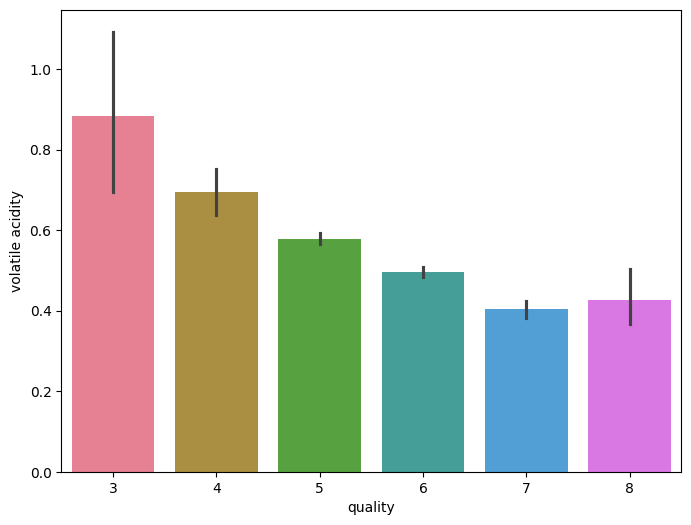

In [ ]:
# volatile acidity vs Quality
plot = plt.figure(figsize=(8,6))
sns.barplot(x = 'quality' , y = 'volatile acidity' , data = wine_dataset , palette='husl')
plt.show()

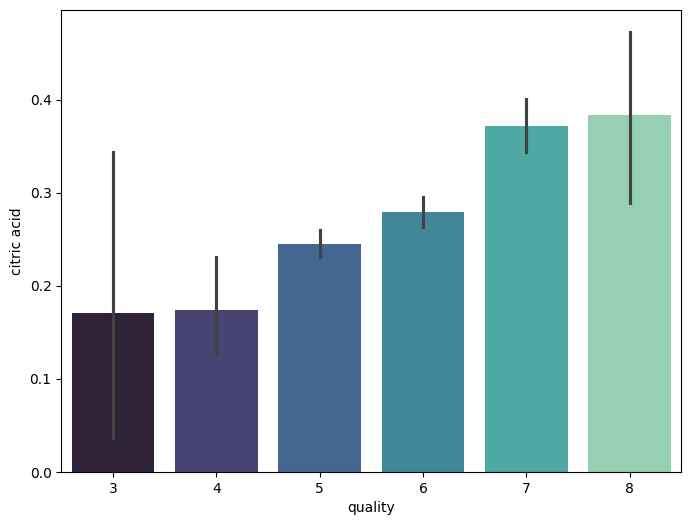

In [ ]:
# citric acid vs Quality
plot = plt.figure(figsize=(8,6))
sns.barplot(x = 'quality' , y = 'citric acid' , data = wine_dataset , palette='mako')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

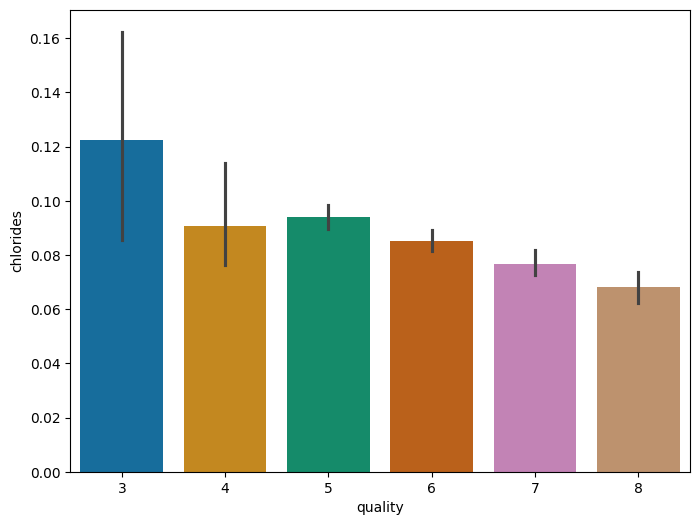

In [ ]:
# chlorides vs Quality
plot = plt.figure(figsize=(8,6))
sns.barplot(x = 'quality' , y = 'chlorides' , data = wine_dataset , palette = "colorblind")
plt.show

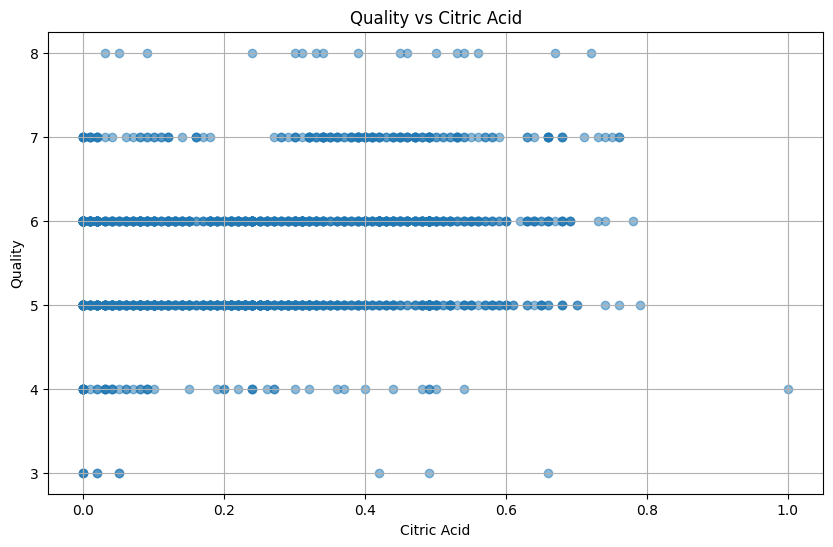

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(wine_dataset['citric acid'], wine_dataset['quality'], alpha=0.5)
plt.title('Quality vs Citric Acid')
plt.xlabel('Citric Acid')
plt.ylabel('Quality')
plt.grid(True)
plt.show()

***Correlation***

In [ ]:
correlation = wine_dataset.corr()

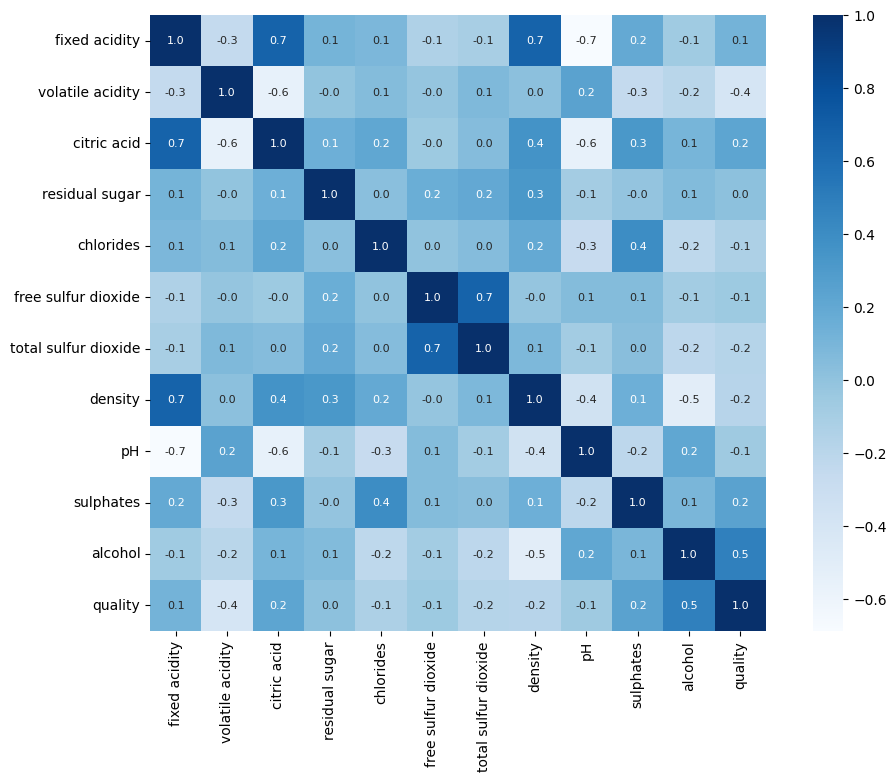

In [ ]:
#Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(correlation , cbar = True , square = True , fmt = '.1f' , annot = True , annot_kws = {'size':8} , cmap = 'Blues')
plt.show()

***Data Preprocessing***

In [ ]:
# Separate the data and label
X = wine_dataset.drop('quality' , axis = 1)
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


***Label Binarization***

In [ ]:
Y = wine_dataset['quality'].apply(lambda y_values : 1 if y_values>=7 else 0)

In [ ]:
Y

0       0
1       0
2       0
3       0
5       0
       ..
1593    0
1594    0
1595    0
1597    0
1598    0
Name: quality, Length: 1359, dtype: int64

***Splitting Data Into Train And Test***

In [ ]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size=0.2 , random_state=3)

In [ ]:
print(Y.shape , Y_train.shape , Y_test.shape)

(1359,) (1087,) (272,)


***Training Model***

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [ ]:
lr_model = LogisticRegression(solver = "liblinear")
lr_model.fit(X_train_scaled, Y_train)

LogisticRegression(solver='liblinear')

In [ ]:
lr_model.feature_names_in_ = list(X_train.columns)
Y_pred = lr_model.predict(X_test)
Y_pred

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0])

In [ ]:
lr_test_acc = accuracy_score(Y_test,Y_pred)

print("Accuracy Score of Logistic Regression Model:",lr_test_acc)

Accuracy Score of Logistic Regression Model: 0.6102941176470589


In [ ]:
from sklearn.metrics import  precision_score, recall_score, f1_score, confusion_matrix

# Precision
precision = precision_score(Y_test, Y_pred)
print("\nPrecision:", precision)

# Recall
recall = recall_score(Y_test, Y_pred)
print("\nRecall:", recall)

# F1 Score
f1 = f1_score(Y_test, Y_pred)
print("\nF1 Score:", f1)

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("\nConfusion Matrix:\n")
conf_matrix


Precision: 0.2066115702479339

Recall: 0.7142857142857143

F1 Score: 0.3205128205128205

Confusion Matrix:



array([[141,  96],
       [ 10,  25]])

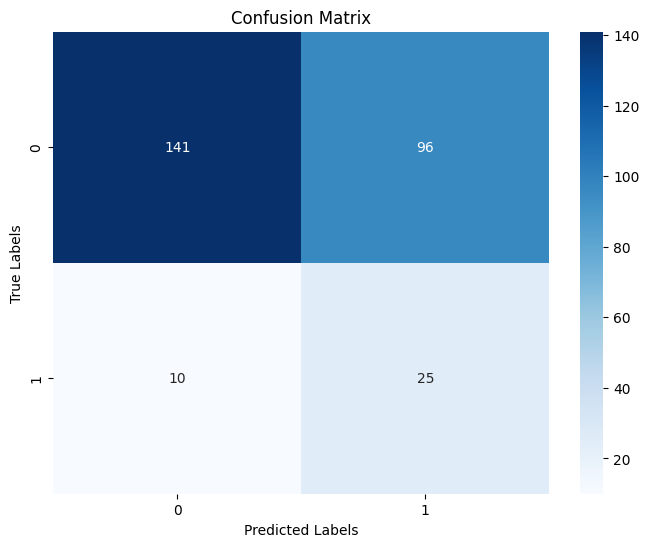

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

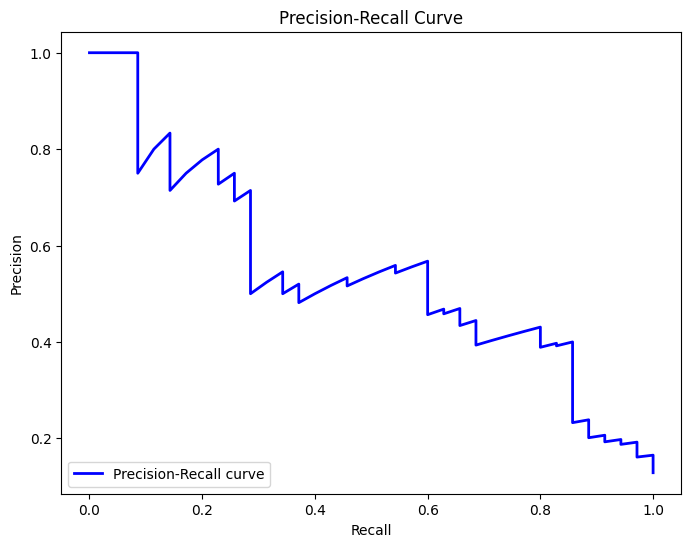

In [ ]:
from sklearn.metrics import precision_recall_curve, auc
X_test_scaled = scaler.fit_transform(X_test)
Y_probs = lr_model.predict_proba(X_test_scaled)[:, 1]
# Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(Y_test, Y_probs)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

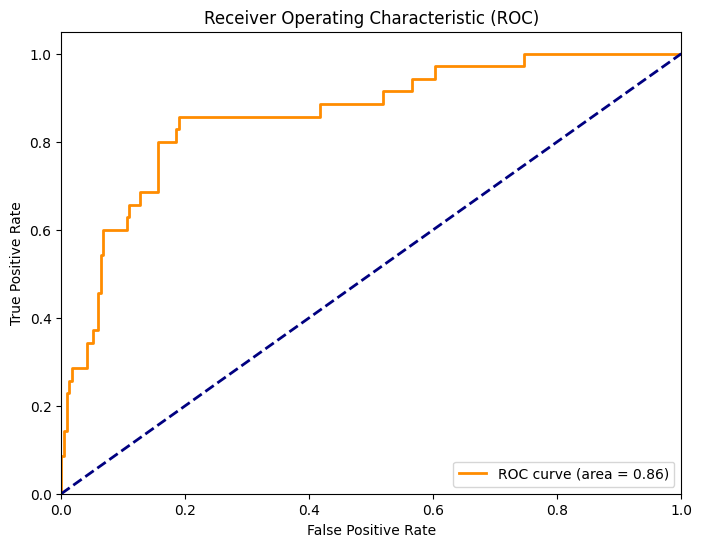

In [ ]:
from sklearn.metrics import roc_curve, auc
X_test_scaled = scaler.transform(X_test)
probabilities = lr_model.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(Y_test, probabilities)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

***Input Data For Predictive System***

In [ ]:
# Select a random row from the test set
random_index = np.random.randint(0, len(X_test))
print(random_index)
input_data = X_test_scaled[random_index].reshape(1, -1)

selected_row = X_test.iloc[random_index]
print("\nRandomly selected row from the test set:")
selected_row

167

Randomly selected row from the test set:


fixed acidity            8.90000
volatile acidity         0.28000
citric acid              0.45000
residual sugar           1.70000
chlorides                0.06700
free sulfur dioxide      7.00000
total sulfur dioxide    12.00000
density                  0.99354
pH                       3.25000
sulphates                0.55000
alcohol                 12.30000
Name: 1010, dtype: float64

***Logistic Regression Predictive Model***

In [ ]:
threshold = 0.5
lr_model_probabilities = lr_model.predict_proba(input_data)
print(lr_model_probabilities)

if lr_model_probabilities[0][1] >= threshold:
    print("\nThe Quality Of Wine is Good !!!\n")
    print("Good Quality Wine! Savor your beverage and enjoy the moment!\n")
else:
    print("\nThe Quality Of Wine is Bad !!!\n")
    print("Bad quality, Avoid drinking!\n")

[[0.36289775 0.63710225]]

The Quality Of Wine is Good !!!

Good Quality Wine! Savor your beverage and enjoy the moment!

